In [1]:
import numpy as np
import pandas as pd

In [2]:
rowdata={'电影名称':['无问西东','后来的我们','前任3','红海行动','唐人街探案','战狼2'],
'打斗镜头':[1,5,12,108,112,115],
'接吻镜头':[101,89,97,5,9,8],
'电影类型':['爱情片','爱情片','爱情片','动作片','动作片','动作片']}

In [3]:
movie_data = pd.DataFrame(rowdata)
movie_data

,电影名称,打斗镜头,接吻镜头,电影类型
0,无问西东,1,101,爱情片
1,后来的我们,5,89,爱情片
2,前任3,12,97,爱情片
3,红海行动,108,5,动作片
4,唐人街探案,112,9,动作片
5,战狼2,115,8,动作片


In [4]:
# 特征标签
labels = movie_data['电影类型']
labels

0    爱情片
1    爱情片
2    爱情片
3    动作片
4    动作片
5    动作片
Name: 电影类型, dtype: object

## sklearn 实现紧邻树

In [5]:
# sklearn
from sklearn.neighbors import KNeighborsClassifier

In [6]:
# 实例化
clf = KNeighborsClassifier(n_neighbors=4)
clf = clf.fit(movie_data.iloc[:,1:3],[0,0,0,1,1,1]) # 训练模型
result = clf.predict([[24,67]]) # 返回预测的标签
result

array([0])

In [7]:
# 返回预测某标签的概率
clf.predict_proba([[24,67]])

array([[0.75, 0.25]])

## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [38]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [39]:
x = data.data
y = data.target

In [40]:
x.shape

(569, 30)

In [41]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [43]:
y.shape

(569,)

In [44]:
# 划分训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [45]:
# 建立模型、模型评估
clf = KNeighborsClassifier(n_neighbors=4)
clf = clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
score

0.9298245614035088

In [50]:
clf.kneighbors(x_test[[30,20],:],return_distance=True)

(array([[24.0200105 , 24.02200915, 25.73097863, 26.4625413 ],
        [14.06223999, 16.78761549, 21.86059482, 24.51555585]]),
 array([[346, 409, 274,  84],
        [426, 381, 262,  77]], dtype=int64))

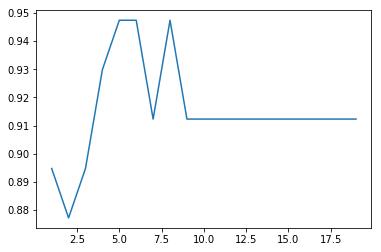

In [54]:
# 学习曲线
import matplotlib.pyplot as plt

score = []
krange = range(1,20)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf = clf.fit(x_train,y_train)
    score.append(clf.score(x_test,y_test))

plt.plot(krange,score)

In [61]:
krange[score.index(max(score))]-1

4

In [62]:
score[krange[score.index(max(score))]-1]

0.9473684210526315

7
0.9298245614035088


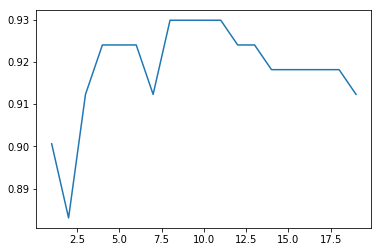

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
score = []
krange = range(1,20)
for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf = clf.fit(x_train,y_train)
    score.append(clf.score(x_test,y_test))
plt.plot(krange,score);
bestindex = krange[score.index(max(score))]-1
print(bestindex)
print(score[bestindex])

In [74]:
# 交叉验证
from sklearn.model_selection import cross_val_score as CVS

clf = KNeighborsClassifier(n_neighbors=3)
cvresult = CVS(clf,x_train,y_train,cv=5)
cvresult

array([0.925     , 0.9125    , 0.9375    , 0.93670886, 0.91139241])

In [75]:
cvresult.mean()

0.9246202531645569

In [76]:
cvresult.var()

0.0001268086043903223

18
0.9317507129893698


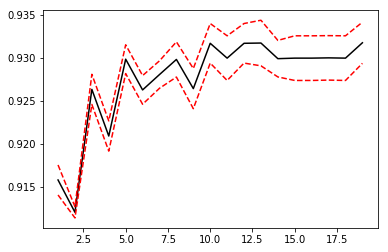

In [79]:
score = []
var_ = []
krange = range(1,20)
for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf,x,y,cv=10)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
plt.plot(krange,score,color="k")
plt.plot(krange,np.array(score)+np.array(var_)*2,c="red",linestyle="--")
plt.plot(krange,np.array(score)-np.array(var_)*2,c="red",linestyle="--")
bestindex = krange[score.index(max(score))]-1
print(bestindex)
print(score[bestindex])

8
0.9684494036167756


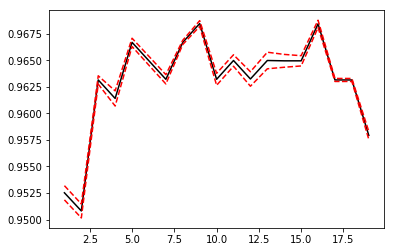

In [80]:
from sklearn.preprocessing import MinMaxScaler as mms
x_ = mms().fit_transform(x)

score = []
var_ = []
krange = range(1,20)
for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf,x_,y,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
plt.plot(krange,score,color="k")
plt.plot(krange,np.array(score)+np.array(var_)*2,c="red",linestyle="--")
plt.plot(krange,np.array(score)-np.array(var_)*2,c="red",linestyle="--")
bestindex = krange[score.index(max(score))]-1
print(bestindex)
print(score[bestindex])

In [81]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(data)
result = scaler.transform(data)
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [86]:
result_ = scaler.fit_transform(data)
result_

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [89]:
from sklearn.preprocessing import MinMaxScaler as mms

5
0.9724358974358974


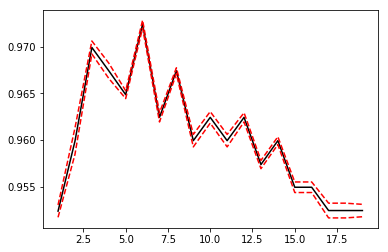

In [96]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=1)
MMS = mms().fit(x_train) 
Xtest_ = MMS.transform(x_test) 
Xtrain_ = MMS.transform(x_train) 
score = []
var_ = []
krange = range(1,20)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf,Xtrain_,y_train,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
plt.plot(krange,score,color="k")
plt.plot(krange,np.array(score)+np.array(var_)*2,c="red",linestyle="--")
plt.plot(krange,np.array(score)-np.array(var_)*2,c="red",linestyle="--")
bestindex = krange[score.index(max(score))]-1
print(bestindex)
print(score[bestindex])

In [107]:
clf = KNeighborsClassifier(n_neighbors=5).fit(Xtrain_,y_train)
score = clf.score(Xtest_,y_test)
score

0.9590643274853801

2
0.9699358974358974


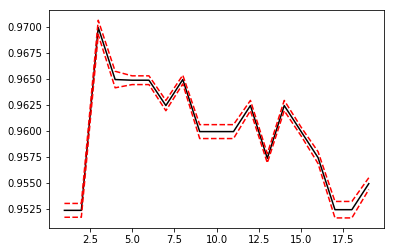

In [104]:
score = []
var_ = []
krange = range(1,20)
for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i,weights="distance")
    cvresult = CVS(clf,Xtrain_,y_train,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
plt.plot(krange,score,color="k")
plt.plot(krange,np.array(score)+np.array(var_)*2,c="red",linestyle="--")
plt.plot(krange,np.array(score)-np.array(var_)*2,c="red",linestyle="--")
bestindex = krange[score.index(max(score))]-1
print(bestindex)
print(score[bestindex])

In [105]:
clf = KNeighborsClassifier(n_neighbors=2,weights='distance').fit(Xtrain_,y_train)
score= clf.score(Xtest_,y_test)
score

0.9473684210526315